<a href="https://colab.research.google.com/github/Jalamana-Sirisha/OIBSIP_domain_taskno/blob/main/Task_2_Unemployment_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#Load the dataset into pandas dataframe
dfunemployment = pd.read_csv("/content/Unemployment in India.csv")
type(dfunemployment)

pandas.core.frame.DataFrame

In [ ]:
dfunemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
dfunemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
dfunemployment.shape

(768, 7)

In [ ]:
dfunemployment.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
dfunemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#Correlation Matrix
dfunemployment.corr(numeric_only = True)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


<Axes: >

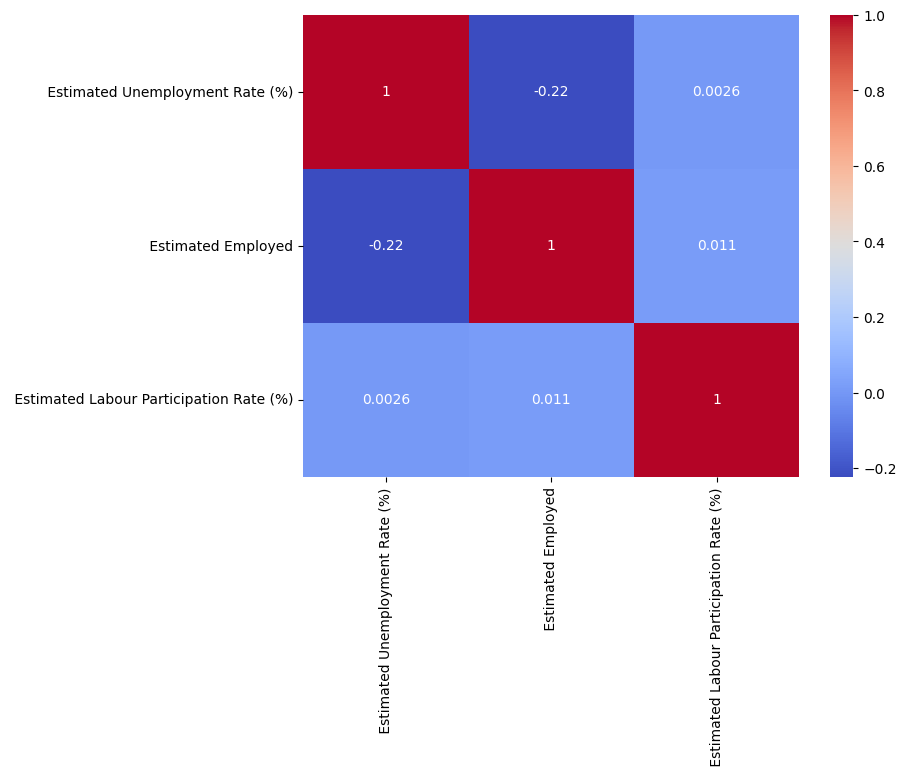

In [ ]:
corr=dfunemployment.corr(numeric_only = True)
fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [ ]:
#Exploratory data analysis (EDA)
dfunemployment.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region"]

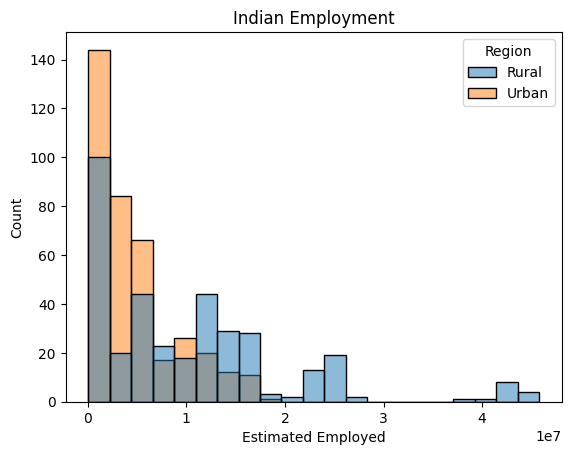

In [ ]:
plt.title("Indian Employment")
sns.histplot(x="Estimated Employed",hue="Region",data=dfunemployment)
plt.show()


In [ ]:
dfunemployment.dropna(how='all',inplace=True)

In [ ]:

unemployment = dfunemployment[["States","Region","Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment,path=["Region","States"],
    values="Estimated Unemployment Rate",
    width=700,
    height=700,
    color_continuous_scale="rdylbu",
    title="Unemployment Rate in India",
    template="presentation"
    )
figure.show()

In [ ]:
#Impact of Lockdown on states Estimated Employed
import calendar
dfunemployment['Date'] = pd.to_datetime(dfunemployment['Date'],dayfirst=True)
dfunemployment['Frequency']=dfunemployment['Frequency'].astype('category')
dfunemployment['Region']=dfunemployment['Region'].astype('category')
dfunemployment['Month']=dfunemployment['Date'].dt.month
dfunemployment['Month_int']=dfunemployment['Month'].apply(lambda x:int(x))
dfunemployment.drop(columns='Month',inplace=True)
dfunemployment.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [ ]:
bf_lockdown=dfunemployment[(dfunemployment['Month_int'] >= 1 ) & (dfunemployment['Month_int'] <=4 )]
lockdown = dfunemployment[(dfunemployment['Month_int'] >= 4) & (dfunemployment['Month_int'] <=7)]
m_bf_lock=bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
m_lock=lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
m_lock['Unemployment Rate before lockdown'] = m_bf_lock['Estimated Unemployment Rate']
m_lock.columns=['States','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
m_lock.head()

,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [ ]:
#Percentage change in employment rate
m_lock['percentage change in Unemployment'] = round(m_lock['Unemployment Rate after lockdown']-m_lock['Unemployment Rate before lockdown']/m_lock['Unemployment Rate before lockdown'])
plot_per = m_lock.sort_values('percentage change in Unemployment')

fig=px.bar(plot_per,x='States',y='percentage change in Unemployment',color='percentage change in Unemployment',title='percentage change in Unemployment in each state after lockdown')
fig.show()